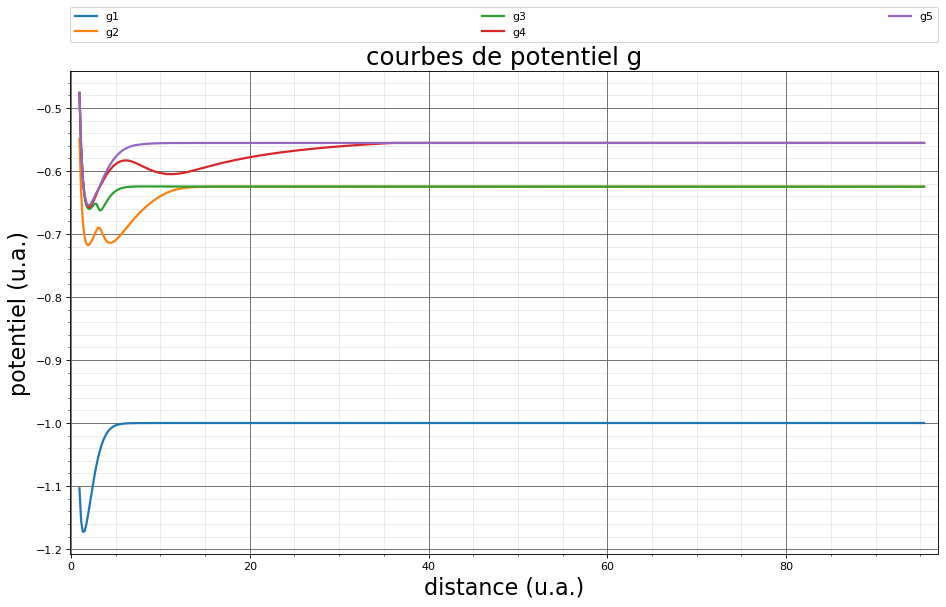

In [2]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from textwrap import wrap
import random
#############################################################################
# ouverture des fichiers et lecture des données
with open ("pec_sigmag.txt", "r") as fichierg: # ouverture du fichier pec_sigmag.txt en mode lecture
    fichierg = open("pec_sigmag.txt", "r")
echelle=1/0.529177
data_g = np.loadtxt(fichierg)
xg_read = data_g[:,0]*echelle
with open ("pec_sigmau.txt", "r") as fichieru: # ouverture du fichier pec_sigmau.txt en mode lecture
    fichieru = open("pec_sigmau.txt", "r")
data_u = np.loadtxt(fichieru)
xu_read = data_u[:,0]*echelle
#########################################################################
# création des fonctions Vgi(x) et Vui(x) qui sont inexées et interpolent les potentiels Vgi et Vui
g1=interp1d(xg_read, data_g[:,1], kind='cubic')
g2=interp1d(xg_read, data_g[:,2], kind='cubic')
g3=interp1d(xg_read, data_g[:,3], kind='cubic')
g4=interp1d(xg_read, data_g[:,4], kind='cubic')
g5=interp1d(xg_read, data_g[:,5], kind='cubic')
Vg = [g1,g2,g3,g4,g5]

g6=interp1d(xu_read, data_u[:,1], kind='cubic')
g7=interp1d(xu_read, data_u[:,2], kind='cubic')
g8=interp1d(xu_read, data_u[:,3], kind='cubic')
g9=interp1d(xu_read, data_u[:,4], kind='cubic')
g10=interp1d(xu_read, data_u[:,5], kind='cubic')
Vu = [g6,g7,g8,g9,g10]
#############################################################################
# impressions et plot
figure(figsize=(14,8), dpi=80)
rcParams['axes.labelsize'] = 20
# Lignes d'unités principales
plt.grid(b=True, which='major', color='#666666', linestyle='-')
# Lignes de subdivision
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
xlabel("distance (u.a.)")
ylabel("potentiel (u.a.)")
plt.xlim(-0.1,97)
for ip in range(1,6):
    plt.plot(xg_read, data_g[:,ip],linewidth=2.0, label="g%d"%(ip,))
    #plt.plot(xu_read, data_u[:,ip],linewidth=0.5, label="u%d"%(ip,))
plt.title ("courbes de potentiel g", fontsize=22)
plt.legend(bbox_to_anchor=(0., 1.06, 1., .106), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.show()


### changement de courbes de potentiel
On va maintenant imaginer qu'un atome $H^-$ se à trouve grande distance, et examiner les trajectoires qu'il pourrait suivre suite à l'action exercée sur lui par le potentiel de $H^+$.

On tire un nombre aléatoire à chaque croisement évité. 
Si la probabilité de Landau-Zener est plus grande que ce nombre , alors on change d'état et on continue la propagation sur la nouvelle courbe jusqu'au prochain croisement évité et ainsi de suite. 

Comme on tire des nombres aléatoires, on ne teste pas le code sur une seule trajectoire. 

On effectue un grand nombre de trajectoires $N_{tot}$ et on compte le nombre $N_i$ qui se terminent dans chaque état $g_i$. Si on fait suffisament de trajectoires, pour des conditions initiales données, la fréquence $N_i/N_{tot}$ sera indépendante des paramètres numériques.

### Déplacement sur une courbe de potentiel
Le programme ci-dessous simule le rapprochement par $H^-$ de $H^+$ sur une branche de potentiel définie au départ.

A chaque croisement évité on tire un nombre aléatoire entre 0 et 1. Si ce nombre est plus grand que la probabilité de Landau Zener, et moyennant les réserves ci-dessous relatives à l'énergie, on interromp le processus de propagation sur le potentiel de départ, et on simule un saut de potentiel, qui conduira à déplacer la particule sur le potentiel qui la "croise". Le sous programme retourne la position et la vitesse de H-, ainsi que l'indice de la fonction potentiel sur laquelle on doit continuer le calcul.


Lors d'un saut, l'énergie doit être conservée, donc :

  a) Avant d'autoriser un saut, il faut vérifier que le système a assez d'énergie. Par exemple, si on est sur l'état 1 avec l'énergie potentielle $Ep1$, que le système a, au croisement évité avec l'état 2, une énergie cinétique $Ec1$, on n'autorisera le saut seulement si $Ep1+Ec1 > Ep2$, si NON on reste sur l'état 1. On appelle ça un "frustrated hop".

  b) Après un saut, il faut également redimensionner la vitesse pour conserver l'énergie totale. On a : 
  $$Ec_{après saut} = Ec_{avant saut} + Ep1 - Ep2$$
 
 En notant $\Delta E = Ep2-Ep1 $, on aura ainsi $\frac{1}{2}m [v_{i+1}^2-v_i^2]=\Delta E$, et par conséquent:
  $$v_{i+1}=\epsilon \sqrt{v_i^2-\frac{2\Delta E}{m}}$$



Le signe de $\epsilon$ est celui de la vitesse si on n'avait pas fait le saut.


croisement évité à x= 11.182432790241398 potentiels Vg 3 rang 2 Landau-Zener 0.00705236654283521 probabilité tirée 0.658707492688533
croisement évité à x= 5.653855061242629 potentiels Vg 3 rang 2 Landau-Zener 2.1513314657337725e-06 probabilité tirée 0.44674904961751294
croisement évité à x= 4.889134135627035 potentiels Vg 1 rang 2 Landau-Zener 1.316381864353481e-05 probabilité tirée 0.6464022093040223
croisement évité à x= 4.469030754395227 potentiels Vg 3 rang 2 Landau-Zener 1.0268980672769863e-06 probabilité tirée 0.03579813034685142
croisement évité à x= 3.727566341898273 potentiels Vg 3 rang 2 Landau-Zener 0.0015123936813360517 probabilité tirée 0.42701194684994837
croisement évité à x= 3.196235670804685 potentiels Vg 1 rang 2 Landau-Zener 0.6070872029976802 probabilité tirée 0.19706948732723373
je suis passé par ici g 1
je suis passé là 2 1
3.20586390736379
arrêt routine 3.20586390736379 j ai fait 6509 boucles indice pot 2 1
je suis à l abscisse 3.20586390736379 ancien indice 3
à 

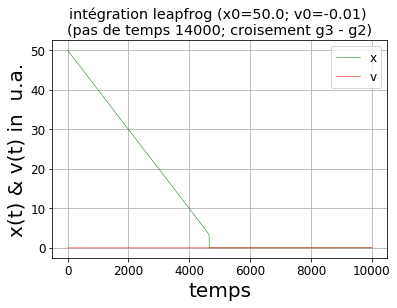

In [6]:
x0=50. 
v0=-0.01

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=3

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 14000   
tps=10000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
       
    i=1  
    while i in range(1,Mm-2) and xb[i]<90:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*k0
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:         
            index2, L_Z, vb[l-1], vb[l] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                print('je suis passé là', index1, index2)
                break
     
    print(abs(xb[l]))
    print('arrêt routine', xb[l], 'j ai fait', l, 'boucles', 'indice pot', index1, index2)
    return xb,vb,index2,index1,l

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for j in range(1,5):
                    
            if j==asterix: continue
            else:
                Potentiel2=Vg[j]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
                    
                    Prob = random.random()
                    
                   
                    print('croisement évité à x=',x_3 ,'potentiels Vg',j,'rang',asterix,'Landau-Zener', La_Ze, 'probabilité tirée', Prob)
                    
                    if La_Ze>Prob: 
                        a = verif_energie(x_3,v_2,v_3,asterix,j)
                        v_3=a
                        indef=j
                        print('je suis passé par ici', 'g', indef)
                    
                        
                    break
                 
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos,vit1,vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  

############################################################################### 
###############################################################################
# module représentation graphique (si nécessaire)
def graphique(ind1, ind2, x0, v0, tp, x, v):
    rcParams["axes.grid"] = True
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 20


    plt.plot(tp,x,'g',linewidth=0.5, label='x')
    plt.plot(tp,v,'r',linewidth=0.5, label='v')

    xlabel("temps")
    express1="x(t) & v(t) in  u.a."
    ylabel(express1)

    plt.legend(loc='best', frameon= True)

    e1="g"+str(ind1)
    e2="g"+str(ind2)
    Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
    Titreb = "(pas de temps {}; croisement {} - {})".format(Mm,e1,e2)
    plt.title(Titrea % "\n".join(wrap(Titreb)))

    show()
    return
###############################################################################
# programme principal
###############################################################################

indice1 = potentiel_départ-1 #attention 2 est l'indice de g3
Potentiel=Vg[indice1]

########################
# Initialisation à 0 des variables, et Conditions initiales
xinit = zeros(Mm)
vinit = zeros(Mm)

xinit[0] = x0
vinit[0] = v0
k0= derivpot(x0,Potentiel)/m
vinit[1] = vinit[0] - dtp*k0
xinit[1] = xinit[0] + dtp*vinit[1]
 


x,v,indice2,indice1,nb = branche(xinit,vinit,Vg[indice1], Mm, indice1)
print('je suis à l abscisse', x[nb], 'ancien indice', indice1+1)
print('à la vitesse', v[nb])
print('nouveau potentiel g', indice2+1)
graphique(potentiel_départ, indice2+1, x0, v0, tp, x, v)


#### Le programme ci-dessous simule l'aller-retour de $H^-$ vers $H^+$.
On imagine $H^-$situé à l'infini de $H^+$, munis d'une certaine vitesse et se rapprochant l'un de l'autre, puis s'éloignant à nouveau, et on cherche à déterminer si $H^-$ va rester sur la même courbe de potentiel lors du rebond.
Dans la pratique on part assez loin, et on arrête avant la limite des courbes de potentiel.

routine Landau croisement évité à x= 49.833305521768224 potentiels fin Vg 4 et init 3 Landau-Zener 0.9844629312471139 probabilité tirée 0.930965583089404
je suis passé par ici routine Landau g 4 5
arrêt routine branche 49.833305521768224 j ai fait 10 boucles indice pot 3 4
je suis à l abscisse 49.816636076335826
vitesse -0.00999868671357128
nouveau potentiel g 5


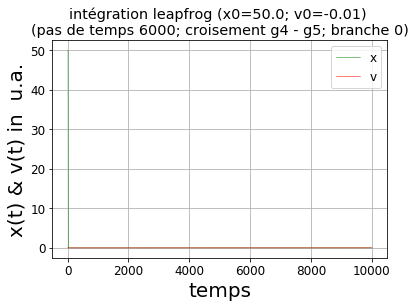

je n ai pas fini
routine Landau croisement évité à x= 44.833108762020316 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.7882972653044066
routine Landau croisement évité à x= 42.64968535580692 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.01264784861180257
routine Landau croisement évité à x= 26.914593909751204 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.5814857571230552
routine Landau croisement évité à x= 23.79729061236201 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.3880280229007229
routine Landau croisement évité à x= 20.37984312265718 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.01769911787397338
routine Landau croisement évité à x= 11.241161731418124 potentiels fin Vg 3 et init 4 Landau-Zener 3.319706155064188e-09 probabilité tirée 0.9105986896213728
routine Landau croisement évité à x= 5.184429512795835 potentiels fin Vg 1 et init 4 Landau-Zener 1.0105372702083357e-12 proba

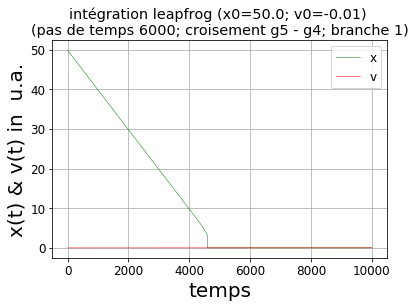

je n ai pas fini
routine Landau croisement évité à x= 2.6507939516688728 potentiels fin Vg 1 et init 3 Landau-Zener 0.01009214893965987 probabilité tirée 0.201346930153256
routine Landau croisement évité à x= 2.4785473603961417 potentiels fin Vg 4 et init 3 Landau-Zener 0.8872079435094681 probabilité tirée 0.8168149905775811
je suis passé par ici routine Landau g 4 5
arrêt routine branche 2.4785473603961417 j ai fait 22 boucles indice pot 3 4
je suis à l abscisse 2.451710833498251
vitesse -0.017154526123447415
nouveau potentiel g 5


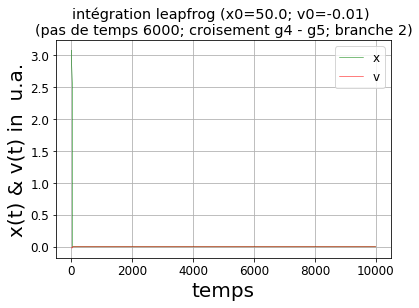

je n ai pas fini
routine Landau croisement évité à x= 1.1561906472626349 potentiels fin Vg 3 et init 4 Landau-Zener 0.9971556639590461 probabilité tirée 0.5606024441876046
je suis passé par ici routine Landau g 5 4
arrêt routine branche 1.1561906472626349 j ai fait 48 boucles indice pot 4 3
je suis à l abscisse 1.1275950044497538
vitesse -0.01177241819570593
nouveau potentiel g 4


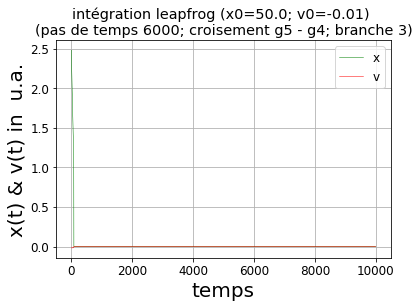

je n ai pas fini
routine Landau croisement évité à x= 1.1883815962613558 potentiels fin Vg 4 et init 3 Landau-Zener 0.9972569307599946 probabilité tirée 0.6220257277052951
je suis passé par ici routine Landau g 4 5
arrêt routine branche 1.1883815962613558 j ai fait 31 boucles indice pot 3 4
je suis à l abscisse 1.1687576286072368
vitesse 0.012876089818406041
nouveau potentiel g 5


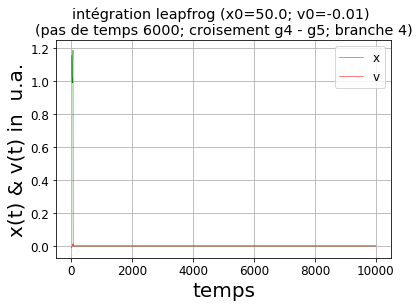

je n ai pas fini
routine Landau croisement évité à x= 1.1911465039625353 potentiels fin Vg 1 et init 4 Landau-Zener 0.3032543753641123 probabilité tirée 0.4614119605743514
routine Landau croisement évité à x= 2.5501676692900905 potentiels fin Vg 3 et init 4 Landau-Zener 0.8885248775924494 probabilité tirée 0.5368754267505909
je suis passé par ici routine Landau g 5 4
arrêt routine branche 2.5501676692900905 j ai fait 48 boucles indice pot 4 3
je suis à l abscisse 2.5716313962752646
vitesse 0.018170242919190345
nouveau potentiel g 4


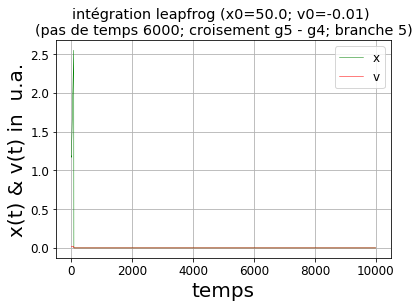

je n ai pas fini
routine Landau croisement évité à x= 2.721634693112691 potentiels fin Vg 1 et init 3 Landau-Zener 0.015405869889838995 probabilité tirée 0.0821926717210415
routine Landau croisement évité à x= 3.128022452510034 potentiels fin Vg 4 et init 3 Landau-Zener 0.9961740756129405 probabilité tirée 0.7342901669726813
je suis passé par ici routine Landau g 4 5
arrêt routine branche 3.128022452510034 j ai fait 20 boucles indice pot 3 4
je suis à l abscisse 3.1583112388397394
vitesse 0.0169789080364432
nouveau potentiel g 5


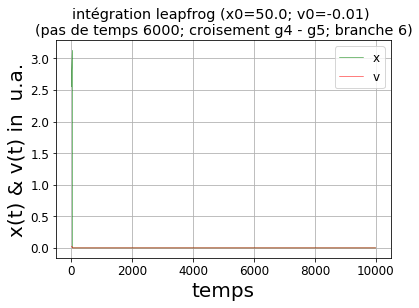

je n ai pas fini
routine Landau croisement évité à x= 5.231158093360903 potentiels fin Vg 1 et init 4 Landau-Zener 1.5502020748815186e-11 probabilité tirée 0.1576951799732308
routine Landau croisement évité à x= 11.278741822411774 potentiels fin Vg 3 et init 4 Landau-Zener 4.627342622467264e-08 probabilité tirée 0.8863126243382496
routine Landau croisement évité à x= 20.422556158942747 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.4128522283828109
routine Landau croisement évité à x= 23.836125755070185 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.7828100870361281
routine Landau croisement évité à x= 26.96035482380902 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.7817621379917101
routine Landau croisement évité à x= 42.67683597218467 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.5759466764415411
routine Landau croisement évité à x= 44.87509979854653 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabi

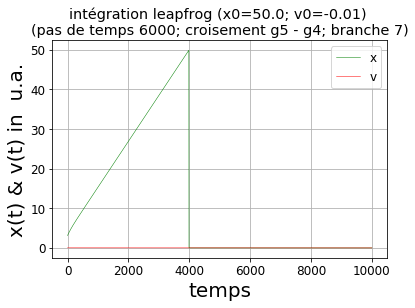

je n ai pas fini
routine Landau croisement évité à x= 57.457322912865706 potentiels fin Vg 1 et init 3 Landau-Zener 0.0 probabilité tirée 0.2893437388092276
routine Landau croisement évité à x= 68.25678523595184 potentiels fin Vg 1 et init 3 Landau-Zener 0.0 probabilité tirée 0.4876354976919922
routine Landau croisement évité à x= 75.43071378008564 potentiels fin Vg 4 et init 3 Landau-Zener 0.9726449056169368 probabilité tirée 0.9173218662330065
je suis passé par ici routine Landau g 4 5
arrêt routine branche 75.43071378008564 j ai fait 1325 boucles indice pot 3 4
je suis à l abscisse 75.44999860688482
vitesse 0.011567385410601814
nouveau potentiel g 5


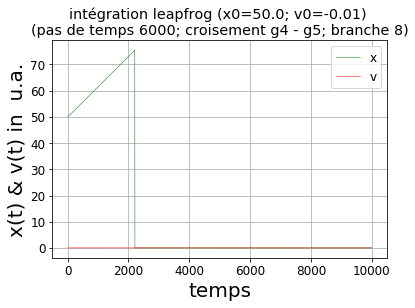

je n ai pas fini
routine Landau croisement évité à x= 88.4268905299407 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.5012540415048345
routine Landau croisement évité à x= 88.56186551652831 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.829569152710671
routine Landau croisement évité à x= 88.61971193924069 potentiels fin Vg 3 et init 4 Landau-Zener 0.9950356519565902 probabilité tirée 0.11673077240196827
je suis passé par ici routine Landau g 5 4
arrêt routine branche 88.61971193924069 j ai fait 684 boucles indice pot 4 3
je suis à l abscisse 88.63899412862325
vitesse 0.011568835146905702
nouveau potentiel g 4


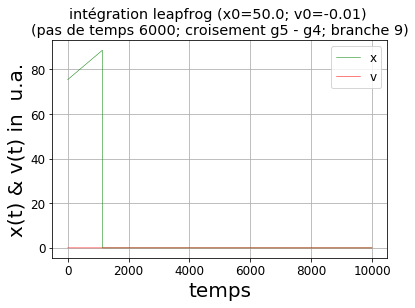

je n ai pas fini
routine Landau croisement évité à x= 88.73541715644102 potentiels fin Vg 4 et init 3 Landau-Zener 0.9958895479571227 probabilité tirée 0.15059857988633218
je suis passé par ici routine Landau g 4 5
arrêt routine branche 88.73541715644102 j ai fait 6 boucles indice pot 3 4
je suis à l abscisse 88.75470176245352
vitesse 0.011567354874174958
nouveau potentiel g 5


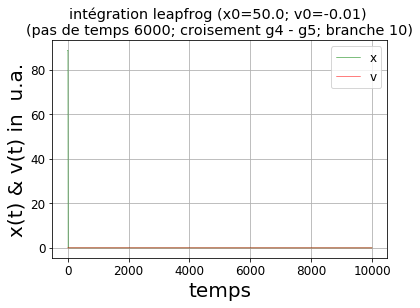

je n ai pas fini
routine Landau croisement évité à x= 88.7739839009813 potentiels fin Vg 1 et init 4 Landau-Zener 0.0 probabilité tirée 0.5572263717008471
routine Landau croisement évité à x= 88.79326603972162 potentiels fin Vg 2 et init 4 Landau-Zener 0.0 probabilité tirée 0.12182500567722243
routine Landau croisement évité à x= 89.02465177159915 potentiels fin Vg 1 et init 4 Landau-Zener 2.0893341976924953e-249 probabilité tirée 0.8044510944331908
routine Landau croisement évité à x= 89.04393391975323 potentiels fin Vg 3 et init 4 Landau-Zener 0.9979746753847396 probabilité tirée 0.706672302025284
je suis passé par ici routine Landau g 5 4
arrêt routine branche 89.04393391975323 j ai fait 16 boucles indice pot 4 3
je suis à l abscisse 89.06321605823327
vitesse 0.01156883281210602
nouveau potentiel g 4


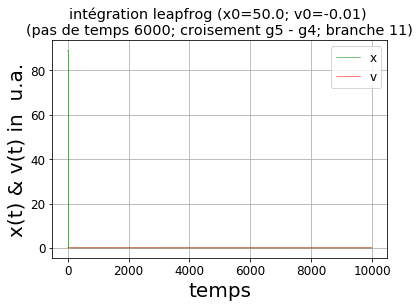

je n ai pas fini
routine Landau croisement évité à x= 89.29463127234601 potentiels fin Vg 4 et init 3 Landau-Zener 0.9974626452907992 probabilité tirée 0.31527572075260824
je suis passé par ici routine Landau g 4 5
arrêt routine branche 89.29463127234601 j ai fait 13 boucles indice pot 3 4
je suis à l abscisse 89.31391587446655
vitesse 0.011567353277561764
nouveau potentiel g 5


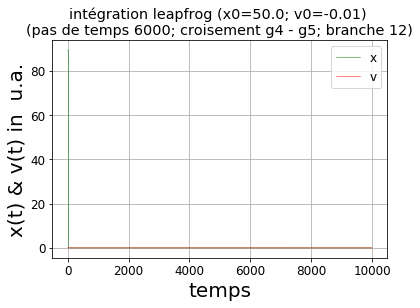

je n ai pas fini
routine Landau croisement évité à x= 89.33319801051327 potentiels fin Vg 2 et init 4 Landau-Zener 1.391034544183257e-309 probabilité tirée 0.6355551773638713
routine Landau croisement évité à x= 89.58386588124213 potentiels fin Vg 1 et init 4 Landau-Zener 6.442087717771417e-216 probabilité tirée 0.23292145714303003
routine Landau croisement évité à x= 89.6031480311628 potentiels fin Vg 3 et init 4 Landau-Zener 0.9983161394964868 probabilité tirée 0.8809114054349805
je suis passé par ici routine Landau g 5 4
arrêt routine branche 89.6031480311628 j ai fait 16 boucles indice pot 4 3
je suis à l abscisse 89.62243016698137
vitesse 0.011568829960641867
nouveau potentiel g 4


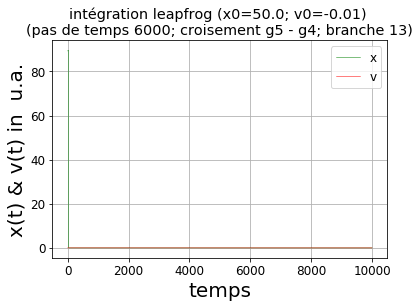

je n ai pas fini
routine Landau croisement évité à x= 89.83456072872923 potentiels fin Vg 4 et init 3 Landau-Zener 0.9975036438061976 probabilité tirée 0.4525307291500589
je suis passé par ici routine Landau g 4 5
arrêt routine branche 89.83456072872923 j ai fait 12 boucles indice pot 3 4
je suis à l abscisse 89.85384532609653
vitesse 0.011567353271471828
nouveau potentiel g 5


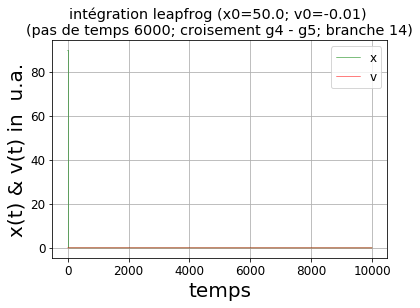

je n ai pas fini
routine Landau croisement évité à x= 89.87312746204918 potentiels fin Vg 2 et init 4 Landau-Zener 0.0 probabilité tirée 0.3924999085205624
routine Landau croisement évité à x= 89.98882028385073 potentiels fin Vg 2 et init 4 Landau-Zener 0.0 probabilité tirée 0.047008166559246445
j ai fini le trajet. potentiel de départ g 5 potentiel d arrivée 5
j ai fait 15 branches


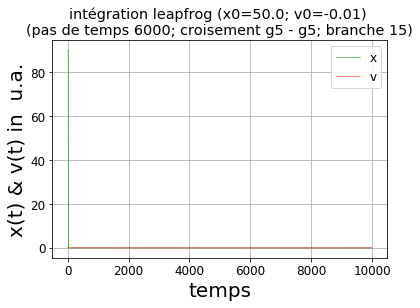

In [3]:
x0=50. 
v0=-0.01

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=4

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 6000   
tps=10000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
    l=0
    index2=0
    i=1  
    while i in range(1,Mm-2) and xb[i]<90:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*k0
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:
            
            index2, L_Z, vb[l], vb[l+1] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                
                
                print('arrêt routine branche', xb[l+1], 'j ai fait', l+1, 'boucles', 'indice pot', index1, index2)
                
                break
            
        
    if  xb[l+1]>90:
        flg=0
              
    else:
        flg=1
                        
        
    return xb,vb,index2,index1,l+1,flg

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for jpf in range(1,5):
                    
            if jpf==asterix: continue
            else:
                Potentiel2=Vg[jpf]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*d2V))))
                    
                    Prob = random.random()
                    
                   
                    print('routine Landau croisement évité à x=',x_3 ,'potentiels fin Vg',jpf,'et init',asterix,'Landau-Zener', La_Ze, 'probabilité tirée', Prob)
                    
                    if La_Ze>Prob: 
                        a = verif_energie(x_3,v_3,asterix,jpf)
                        v_3=a
                        indef=jpf
                        print('je suis passé par ici routine Landau', 'g', asterix+1,indef+1)
                    
                        
                    break
            
     
                             
                    
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos, vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  

############################################################################### 
###############################################################################
# module représentation graphique (si nécessaire)
def graphique(indice1, indice2, x0, v0, tp, x, v,gf):
    rcParams["axes.grid"] = True
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 20


    plt.plot(tp,x,'g',linewidth=0.5, label='x')
    plt.plot(tp,v,'r',linewidth=0.5, label='v')

    xlabel("temps")
    express1="x(t) & v(t) in  u.a."
    ylabel(express1)

    plt.legend(loc='best', frameon= True)

    e1="g"+str(indice1)
    e2="g"+str(indice2)
    Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
    Titreb = "(pas de temps {}; croisement {} - {}; branche {})".format(Mm,e1,e2,gf)
    plt.title(Titrea % "\n".join(wrap(Titreb)))

    show()
    return
###############################################################################
# programme principal
###############################################################################

indice1 = potentiel_départ-1 #attention 2 est l'indice de g3
Potentiel=Vg[indice1]


gf=0


########################
# Initialisation à 0 des variables, et Conditions initiales
xinit = zeros(Mm)
vinit = zeros(Mm)

xinit[0] = x0
vinit[0] = v0
k0= derivpot(x0,Potentiel)/m
vinit[1] = vinit[0] - dtp*k0
xinit[1] = xinit[0] + dtp*vinit[1]
 

while gf<20:
    x,v,indice2,indice1,nb,arrt = branche(xinit,vinit,Vg[indice1], Mm, indice1) #si nb=0 fin de la session
    if arrt==0: 
        print('j ai fini le trajet. potentiel de départ g', indice1+1, 'potentiel d arrivée', indice2+1)
        print('j ai fait', gf, 'branches')
        graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)
        break
    else:
        Potentiel=Vg[indice2]
        xinit = zeros(Mm)
        vinit = zeros(Mm)
        xinit[0] = x[nb]
        vinit[0] = v[nb]
        k0= derivpot(x0,Potentiel)/m
        vinit[1] = vinit[0] - dtp*k0
        xinit[1] = xinit[0] + dtp*v[1]
        print('je suis à l abscisse', xinit[1])
        print('vitesse',vinit[1])
        print('nouveau potentiel g', indice2+1)
        graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)
        indice1=indice2
        gf=gf+1
        print('je n ai pas fini')



###############################################################################
########################




### Prise en compte du moment cinétique
On considère par exemple que l'on bombarde des ions $H^-$ avec des protons $H^+$ . 

L'équation du Hamiltonien est  modifiée, si on tient compte du terme de moment cinétique qui, au lieu de produire systématiquement un rebond pourra produire une simple déflexion.

Comme le potentiel électronique est symétrique en $r$ (distance entre les deux atomes), le Hamiltonien comprenant la partie de moment cinétique ne dépendra pas des angles, mais seulement de $r$ et $\dot{r}$.

La conservation du moment cinétque assure qu'il sera toujours égal à sa valeur initiale $L=b \mu v_\infty=b \mu v_0$ avec $v_0$ vitesse initiale, $b$ paramètre d'impact (distance minimum entre les atomes en supposant qu'il n'y ait pas de déflexion), et $\mu=\frac{m_p}{2}$, masse réduite des deux atomes.

On peut maintenant écrire le Hamiltonien:
$$H = \frac{\mu}{2}v^2+\frac{L^2}{2\mu r^2} +V(r)$$

Ou encore en tenant compte de $L=b \mu v_0$:
$$H = \frac{\mu}{2}v^2+\frac{b^2\mu v_0^2}{2 r^2} +V(r)$$

La formule de récurrence leapfrog va devoir être modifiée. Tout se passe comme si on avait maintenant un potentiel effectif qui s'écrirait: $V_{eff}=V_0+\frac{b^2 \mu v_0^2}{2x^2}$. Où $V_0$ désigne l'un des potentiels électroniques considérés jusqu'ici. 

L'expression de la double suite récurrente leapfrog devient :


$$
\begin{eqnarray}
v_{n+1} & = & v_{n}+ x_n.\frac{V_{eff}'(x_n)}{m} \Delta t = v_{n}+ \left[x_n.\frac{V_{0}'(x_n)}{m}-\frac{b^2 v_0^2}{x_n^2}\right]\Delta t\\
x_{n+1} & = & x_{n}+v_{n+1}\Delta t 
\end{eqnarray}$$

Il s'introduit donc seulement un terme additif en $-\frac{b^2 v_0^2}{x_n^2}$.

\\

\\

Les croisements évités et le saut de potentiel $\Delta V_{eff}$ ne seront pas affectés par l'ajout du potenttiel de moment cinétique. En revanche la probabilité de Landau-Zener s'écrit maintenant:
$$exp~{\left[{-\frac{\pi}{2}}\cdot\sqrt{~\frac{ \left|~\Delta V_{eff}~\right]^3}{ \left|~3\frac{d^2\Delta V_{eff}}{dt^2}~\right|}}\right]}$$

Et il faudra évaluer $\frac{d^2\Delta V_{eff}}{dt^2}$ par la formule aux différences finies 

$$\frac{d^2 V_{eff}(x_n)}{dt^2}=\frac{V_{eff}(x_{n+1})-2V_{eff}(x_{n})+V_{eff}(x_{n-1})}{\Delta t^2}$$

Comme on a $V_{eff}=V_0+\frac{b^2 \mu v_0^2}{2x^2}$ on aura $\frac{d^2 V_{eff}(x_n)}{dt^2}=\frac{d^2 V_0}{dt^2}+\frac{b^2 \mu v_0^2}{2}\frac{d^2 1/(x^2)}{dt^2}$, et il suffira d'ajouter le second membre à la valeur obtenue précédemment pour le potentiel électronique, c'est à dire de calculer:
$$
\frac{b^2 \mu v_0^2}{2}\frac{d^2 [1/(x^2)]}{dt^2}\simeq \frac{b^2 \mu v_0^2}{2\Delta t^2}\left[\frac{1}{x_{n+1}^2} -2\frac{1}{x_{n}^2}+\frac{1}{x_{n-1}^2} \right]
$$

Terme qui sera négigeable sauf lorsqu'on s'approche de zéro.

Pour ce qui est des conditions initiales, on a pris $x_0=90\; u.a.$ / $b= 1\; u.a.$ /  $v_0=0.04\; u.a. \simeq1\; eV$.

routine Landau croisement évité à x= 89.7332943770404 potentiels fin Vg 4 et init 3 Landau-Zener 0.9993260961002055
je suis passé par ici routine Landau g 4 5
arrêt routine branche 89.7332943770404 j ai fait 4 boucles indice pot 3 4
je suis à l abscisse 89.6666171461518
vitesse -0.039997922807311015
nouveau potentiel g 5


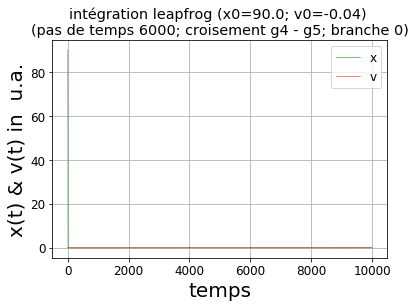

je n ai pas fini
routine Landau croisement évité à x= 89.53327016783199 potentiels fin Vg 1 et init 4 Landau-Zener 1.6381038705988516e-70
routine Landau croisement évité à x= 89.46659751067192 potentiels fin Vg 2 et init 4 Landau-Zener 1.6288810086293786e-73
routine Landau croisement évité à x= 89.26658288318946 potentiels fin Vg 2 et init 4 Landau-Zener 7.747381665363671e-89
routine Landau croisement évité à x= 89.19991245590765 potentiels fin Vg 1 et init 4 Landau-Zener 1.0176361447770044e-96
routine Landau croisement évité à x= 88.9332363335343 potentiels fin Vg 1 et init 4 Landau-Zener 5.428072632696484e-78
routine Landau croisement évité à x= 88.66656921119949 potentiels fin Vg 1 et init 4 Landau-Zener 8.935758819319038e-134
routine Landau croisement évité à x= 88.53323903993507 potentiels fin Vg 3 et init 4 Landau-Zener 0.9985524010350963
je suis passé par ici routine Landau g 5 4
arrêt routine branche 88.53323903993507 j ai fait 18 boucles indice pot 4 3
je suis à l abscisse 88.

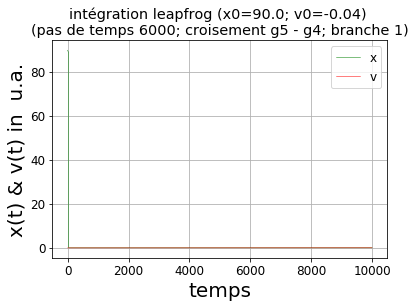

je n ai pas fini
routine Landau croisement évité à x= 75.34587360598069 potentiels fin Vg 4 et init 3 Landau-Zener 0.9963784463101406
je suis passé par ici routine Landau g 4 5
arrêt routine branche 75.34587360598069 j ai fait 198 boucles indice pot 3 4
je suis à l abscisse 75.27920865720834
vitesse -0.039912647050873176
nouveau potentiel g 5


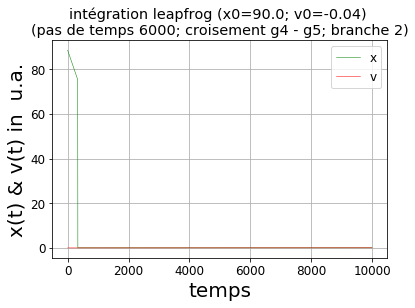

je n ai pas fini
routine Landau croisement évité à x= 49.80646307007094 potentiels fin Vg 3 et init 4 Landau-Zener 0.998902373440575
je suis passé par ici routine Landau g 5 4
arrêt routine branche 49.80646307007094 j ai fait 385 boucles indice pot 4 3
je suis à l abscisse 49.7399309029583
vitesse -0.03963905039760141
nouveau potentiel g 4


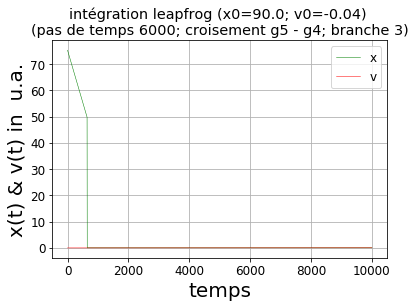

je n ai pas fini
routine Landau croisement évité à x= 12.257672807350326 potentiels fin Vg 1 et init 3 Landau-Zener 0.23840057646994325
je suis passé par ici routine Landau g 4 2
arrêt routine branche 12.257672807350326 j ai fait 574 boucles indice pot 3 1
je suis à l abscisse 12.191596710671543
vitesse -0.03913234905324905
nouveau potentiel g 2


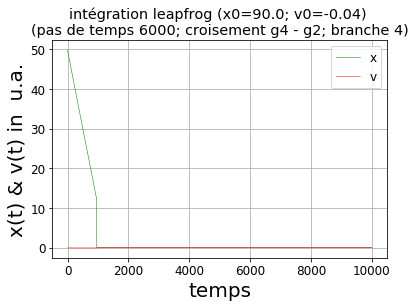

je n ai pas fini
routine Landau croisement évité à x= 5.1673614957607334 potentiels fin Vg 4 et init 1 Landau-Zener 0.00038303703169198066
routine Landau croisement évité à x= 4.863105800502924 potentiels fin Vg 2 et init 1 Landau-Zener 0.049282107815554095
routine Landau croisement évité à x= 3.1689078277777827 potentiels fin Vg 2 et init 1 Landau-Zener 0.7893846055721059
je suis passé par ici routine Landau g 2 3
arrêt routine branche 3.1689078277777827 j ai fait 146 boucles indice pot 1 2
je suis à l abscisse 3.1036763741134235
vitesse -0.029156710918317678
nouveau potentiel g 3


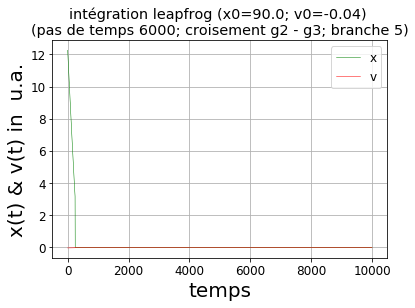

je n ai pas fini
routine Landau croisement évité à x= 1.7213935653486812 potentiels fin Vg 1 et init 2 Landau-Zener 0.3594647649389602
routine Landau croisement évité à x= 3.2724237270431025 potentiels fin Vg 1 et init 2 Landau-Zener 0.800146270930531
je suis passé par ici routine Landau g 3 2
arrêt routine branche 3.2724237270431025 j ai fait 99 boucles indice pot 2 1
je suis à l abscisse 3.2238211084094672
vitesse 0.031139507154943832
nouveau potentiel g 2


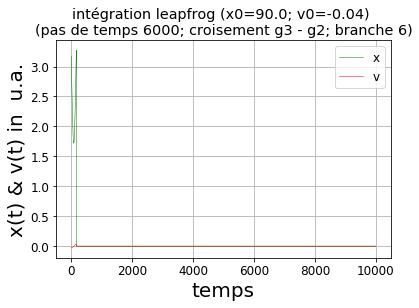

je n ai pas fini
routine Landau croisement évité à x= 3.2762083700639213 potentiels fin Vg 2 et init 1 Landau-Zener 0.9135965333643253
je suis passé par ici routine Landau g 2 3
arrêt routine branche 3.2762083700639213 j ai fait 2 boucles indice pot 1 2
je suis à l abscisse 3.328116199960477
vitesse 0.03066753102524649
nouveau potentiel g 3


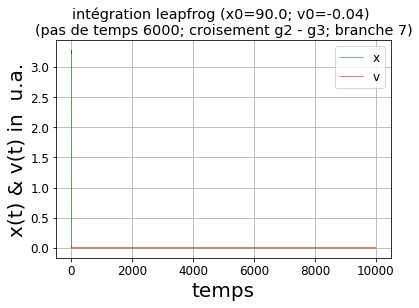

je n ai pas fini
routine Landau croisement évité à x= 3.8025583777297207 potentiels fin Vg 3 et init 2 Landau-Zener 0.22753527300492002
routine Landau croisement évité à x= 4.520823117468057 potentiels fin Vg 3 et init 2 Landau-Zener 0.06978161479318278
routine Landau croisement évité à x= 4.977653931747187 potentiels fin Vg 1 et init 2 Landau-Zener 0.015427019403095533
routine Landau croisement évité à x= 5.739893632089878 potentiels fin Vg 3 et init 2 Landau-Zener 0.07516045466868088
routine Landau croisement évité à x= 11.228150135268598 potentiels fin Vg 3 et init 2 Landau-Zener 0.26426466184393166
routine Landau croisement évité à x= 88.82902357126919 potentiels fin Vg 4 et init 2 Landau-Zener 4.341422043553358e-104
routine Landau croisement évité à x= 89.0406479044277 potentiels fin Vg 4 et init 2 Landau-Zener 9.190961511447747e-83
routine Landau croisement évité à x= 89.39336633317565 potentiels fin Vg 4 et init 2 Landau-Zener 1.4165877132226698e-83
routine Landau croisement évi

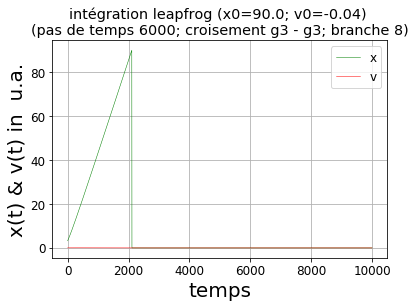

In [19]:
import random
x0=90. 
v0=-0.04

b=1.

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=4

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 6000   
tps=10000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
    l=0
    index2=0
    i=1  
    while i in range(1,Mm-2) and xb[i]<90:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*(k0-(b*v0/xb[i])**2)
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:
            
            index2, L_Z, vb[l], vb[l+1] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                
                
                print('arrêt routine branche', xb[l+1], 'j ai fait', l+1, 'boucles', 'indice pot', index1, index2)
                
                break
            
        
    if  xb[l+1]>90:
        flg=0
              
    else:
        flg=1
                        
        
    return xb,vb,index2,index1,l+1,flg

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for jpf in range(1,5):
                    
            if jpf==asterix: continue
            else:
                Potentiel2=Vg[jpf]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    d2V2=((m/2)*(b*v0/dtp)**2)*((1/x_3**2)-(2/x_2**2)+(1/x_1**2))
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*(d2V+d2V2)))))
                    
                    P=random.random()
                    
                    print('routine Landau croisement évité à x=',x_3 ,'potentiels fin Vg',jpf,'et init',asterix,'Landau-Zener',La_Ze)
                    
                    if La_Ze>P: 
                        a = verif_energie(x_3,v_3,asterix,jpf)
                        v_3=a
                        indef=jpf
                        print('je suis passé par ici routine Landau', 'g', asterix+1,indef+1)
                    
                        
                    break
            
     
                             
                    
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos, vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  

############################################################################### 
###############################################################################
# module représentation graphique (si nécessaire)
def graphique(indice1, indice2, x0, v0, tp, x, v,gf):
    rcParams["axes.grid"] = True
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 20


    plt.plot(tp,x,'g',linewidth=0.5, label='x')
    plt.plot(tp,v,'r',linewidth=0.5, label='v')

    xlabel("temps")
    express1="x(t) & v(t) in  u.a."
    ylabel(express1)

    plt.legend(loc='best', frameon= True)

    e1="g"+str(indice1)
    e2="g"+str(indice2)
    Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
    Titreb = "(pas de temps {}; croisement {} - {}; branche {})".format(Mm,e1,e2,gf)
    plt.title(Titrea % "\n".join(wrap(Titreb)))

    show()
    return
###############################################################################
###############################################################################
# REPRISE PROGRAMME PRINCIPAL
###############################################################################
###############################################################################

indice1 = potentiel_départ-1 #attention 2 est l'indice de g3
Potentiel=Vg[indice1]


gf=0


########################
# Initialisation à 0 des variables, et Conditions initiales
xinit = zeros(Mm)
vinit = zeros(Mm)

xinit[0] = x0
vinit[0] = v0
k0= derivpot(x0,Potentiel)/m
vinit[1] = vinit[0] - dtp*(k0-(b*v0/xinit[0])**2)
xinit[1] = xinit[0] + dtp*vinit[1]
 

    
    
while gf<25:
    x,v,indice2,indice1,nb,arrt = branche(xinit,vinit,Vg[indice1], Mm, indice1) #si nb=0 fin de la session
    if arrt==0: 
        print('j ai fini le trajet. potentiel de départ g', indice1+1, 'potentiel d arrivée', indice2+1)
        print('j ai fait', gf, 'branches')
        graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)
        break
    else:
        Potentiel=Vg[indice2]
        xinit = zeros(Mm)
        vinit = zeros(Mm)
        xinit[0] = x[nb]
        vinit[0] = v[nb]
        k0= derivpot(x0,Potentiel)/m
        vinit[1] = vinit[0] - dtp*(k0-(b*v0/xinit[0])**2)
        xinit[1] = xinit[0] + dtp*v[1]
        print('je suis à l abscisse', xinit[1])
        print('vitesse',vinit[1])
        print('nouveau potentiel g', indice2+1)
        graphique(indice1+1, indice2+1, x0, v0, tp, x, v,gf)
        indice1=indice2
        gf=gf+1
        print('je n ai pas fini')



###############################################################################
########################




### Probabilités de trajectoires
Le but du programme est le suivant:
On part d'une situation où $H^+$ et $H^-$ sont à l'infini avec un potentiel électronique, une énergie cnétique et un paramètre d'impact donnés également, et on note l'état électronique obtenu après la diffusion. Cet état peut être l'un quelconque des g2, g3, g4, ou g5.

En simulant un grand nombre de diffusions, on pourra obtenir une estimation de la probabilité de retrouver la particule diffusée dans un autre état électronique après l'interaction (probabilité estimée par la fréquence).

On va donc créer un vecteur N de dimension  "nombre de trajectoires (typ 100)" x "nombre de b (typ 20)" où on stocke l'indice de l'état électronique à la fin de la collision. 

A partir de ce vecteur, on construit une matrice de dimension $P(état,b)$ de dimension "nombre d'états électroniques" * "nombre de b" (typ 100).

Le programme ci-dessous réalise la première des deux boucles, celle sur le nombre de diffusions (trajets aller-retour). 

La prise en compte de la variation du paramètre d'impact fait l'objet du programme suivant (Encart 19).

In [18]:
import random
x0=90. 
v0=-0.04

b=1.

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=4

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 6000   
tps=10000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
    l=0
    index2=0
    i=1  
    while i in range(1,Mm-2) and xb[i]<90:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*(k0-(b*v0/xb[i])**2)
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:
            
            index2, L_Z, vb[l], vb[l+1] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                
                     
                break
            
        
    if  xb[l+1]>90:
        flg=0
              
    else:
        flg=1
                        
        
    return xb,vb,index2,index1,l+1,flg

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for jpf in range(1,5):
                    
            if jpf==asterix: continue
            else:
                Potentiel2=Vg[jpf]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    d2V2=((m/2)*(b*v0/dtp)**2)*((1/x_3**2)-(2/x_2**2)+(1/x_1**2))
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*(d2V+d2V2)))))
                    
                    P=random.random()
                    
            
                    if La_Ze>P: 
                        a = verif_energie(x_3,v_3,asterix,jpf)
                        v_3=a
                        indef=jpf
         
                        
                    break
            
     
                             
                    
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos, vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  

############################################################################### 
###############################################################################
# module représentation graphique (si nécessaire)
def graphique(indice1, indice2, x0, v0, tp, x, v,gf):
    rcParams["axes.grid"] = True
    rcParams['font.size'] = 12
    rcParams['axes.labelsize'] = 20


    plt.plot(tp,x,'g',linewidth=0.5, label='x')
    plt.plot(tp,v,'r',linewidth=0.5, label='v')

    xlabel("temps")
    express1="x(t) & v(t) in  u.a."
    ylabel(express1)

    plt.legend(loc='best', frameon= True)

    e1="g"+str(indice1)
    e2="g"+str(indice2)
    Titrea="intégration leapfrog (x0={}; v0={}) \n%s".format(x0,v0)
    Titreb = "(pas de temps {}; croisement {} - {}; branche {})".format(Mm,e1,e2,gf)
    plt.title(Titrea % "\n".join(wrap(Titreb)))

    show()
    return
###############################################################################
###############################################################################
# REPRISE PROGRAMME PRINCIPAL
###############################################################################
# Initialisations des variables
###############################################################################

indice1 = potentiel_départ-1 # indice du potentiel de départ attention 2 est l'indice Vg de g3 d'où la soustraction
Potentiel=Vg[indice1]

Nbmax=10 # nombre de boucles faites sur un potentiel de départ donné
Nbbb=2 # nombre de config du moment cinetique initial
gfmax=25 # nombre de branches maximum sur un aller-retour

Ntot=zeros((Nbmax,Nbbb)) # matrice des chemins
Probabl=zeros((4,4)) # matrice des résultats

Nbdiff=0
#########################################################################
# boucle principale
######################################################################
while Nbdiff<Nbmax:

########################
# Initialisation à 0 des variables, et Conditions initiales
    xinit = zeros(Mm)
    vinit = zeros(Mm)

    xinit[0] = x0
    vinit[0] = v0
    k0= derivpot(x0,Potentiel)/m
    vinit[1] = vinit[0] - dtp*(k0-(b*v0/xinit[0])**2)
    xinit[1] = xinit[0] + dtp*vinit[1]
 

    

    gf=0
    
    while gf<gfmax:
        x,v,indice2,indice1,nb,arrt = branche(xinit,vinit,Vg[indice1], Mm, indice1) #si nb=0 fin de la session
        if arrt==0: 
            print(Nbdiff,'j ai fini le trajet. potentiel de départ g', potentiel_départ, 'potentiel d arrivée g', indice2+1)
            print(Nbdiff,'j ai fait', gf, 'branches')
            Ntot[Nbdiff,0]=indice2+1
            Probabl[potentiel_départ-2,indice2-1]=Probabl[potentiel_départ-2,indice2-1]+1
            break
        else:
            Potentiel=Vg[indice2]
            xinit = zeros(Mm)
            vinit = zeros(Mm)
            xinit[0] = x[nb]
            vinit[0] = v[nb]
            k0= derivpot(x0,Potentiel)/m
            vinit[1] = vinit[0] - dtp*(k0-(b*v0/xinit[0])**2)
            xinit[1] = xinit[0] + dtp*v[1]
 
            indice1=indice2
            gf=gf+1
        
    Nbdiff=Nbdiff+1

Probabl=Probabl/Nbmax
print(Ntot)
print(Probabl)



###############################################################################
########################



0 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 3
0 j ai fait 9 branches
1 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 2
1 j ai fait 7 branches
2 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 2
2 j ai fait 2 branches
3 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 2
3 j ai fait 2 branches
4 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 3
4 j ai fait 3 branches
5 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 2
5 j ai fait 1 branches
6 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 5
6 j ai fait 8 branches
7 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 4
7 j ai fait 15 branches
8 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 3
8 j ai fait 7 branches
9 j ai fini le trajet. potentiel de départ g 4 potentiel d arrivée g 2
9 j ai fait 1 branches
[[3. 0.]
 [2. 0.]
 [2. 0.]
 [2. 0.]
 [3. 0.]
 [2. 0.]
 [5. 

In [26]:

x0=90. 
v0=-0.04

###############################################################################
# masse à prendre en compte et index de la fonction de potentiel

m=918.


potentiel_départ=4

###############################################################################
# entrée des paramètres temporels - limite de temps tps pas temporel Mm
Mm = 6000   
tps=10000
tp=np.linspace(0,tps,Mm)
dtp = tp[1] - tp[0]

###############################################################################
# SOUS PROGRAMMES ET FONCTIONS
###############################################################################
# calcul de la valeur de la dérivée du potentiel en un point x
def derivpot(z, Potentiel):
        h=0.00001
        pot=(Potentiel(z+h)-Potentiel(z))/h
        return pot   
###############################################################################
###############################################################################
# création de la fonction resoudre qui donne position et vitesses par la méthode leapfrog (coeur du programme)
def branche(xb,vb, Potentiel, Mm, index1):
########################
# Intégration "leapfrog"
    l=0
    index2=0
    i=1  
    while i in range(1,Mm-2) and xb[i]<90:
        
        k0=derivpot(xb[i],Potentiel)/m
        vb[i + 1] = vb[i] - dtp*(k0-(b*v0/xb[i])**2)
        xb[i + 1] = xb[i] + dtp*vb[i + 1]
        l=i
        
        
        if abs(xb[i+1])<1.1: 
            i=i+1
            continue
        
        else:
            
            index2, L_Z, vb[l], vb[l+1] =Landau(xb[i-1],xb[i],xb[i+1],vb[i],vb[i+1],index1, Potentiel)
            i=i+1
            
            if index2==index1:continue
               
            else:
                
                     
                break
            
        
    if  xb[l+1]>90:
        flg=0
              
    else:
        flg=1
                        
        
    return xb,vb,index2,index1,l+1,flg

############################################################################### 
# croisement
def Landau(x_1,x_2,x_3,v_2,v_3,asterix, Potentiel1):
        dV=zeros(3)
        La_Ze=0
        indef=asterix
        
        for jpf in range(1,5):
                    
            if jpf==asterix: continue
            else:
                Potentiel2=Vg[jpf]
                dV[0]=Potentiel1(x_1)-Potentiel2(x_1)
                dV[1]=Potentiel1(x_2)-Potentiel2(x_2)
                dV[2]=Potentiel1(x_3)-Potentiel2(x_3)
                delta=(dV[1]-dV[0])*(dV[2]-dV[1])
                    
                if delta>0 : continue
    
                else:
                    d2V=(dV[2]-2*dV[1]+dV[0])/dtp**2
        
                    d2V2=((m/2)*(b*v0/dtp)**2)*((1/x_3**2)-(2/x_2**2)+(1/x_1**2))
        
                    La_Ze=exp((-pi/2)*sqrt(abs(dV[1]**3/(3*(d2V+d2V2)))))
                    
                    P=random.random()
                    
            
                    if La_Ze>P: 
                        a = verif_energie(x_3,v_3,asterix,jpf)
                        v_3=a
                        indef=jpf
         
                        
                    break
            
     
                             
                    
        return(indef, La_Ze, v_2,v_3)
############################################################################### 
# Vérification de l'énergie cinétique
def verif_energie(pos, vit2,potinit,potfin):
    
    potar1=Vg[potinit]
    
    potar2=Vg[potfin]
    
    Enrg=vit2**2-2*(potar2(pos)-potar1(pos))/m
    
    if Enrg < 0:
            
        vprim=vit2
            
    else:
#################################
# Mise à l'échelle de l'énergie   
                
        vprim = copysign(sqrt(Enrg),vit2)
        
    return vprim  

############################################################################### 
###############################################################################
###############################################################################
# REPRISE PROGRAMME PRINCIPAL
###############################################################################
# Initialisations des variables
###############################################################################

indice1 = potentiel_départ-1 # indice du potentiel de départ attention 2 est l'indice Vg de g3 d'où la soustraction
Potentiel=Vg[indice1]





Nbmax=10 # nombre de boucles faites sur un potentiel de départ donné
#Nbbb=2 # nombre de config du moment cinetique initial
gfmax=25 # nombre de branches maximum sur un aller-retour
impactmax= 2  #nombre de paramètres d'impacts à considérer

Ntot=zeros((Nbmax,impactmax)) # matrice des chemins


b=1.


Nbimpact=0
#########################################################################
# boucle principale
######################################################################

while Nbimpact<impactmax:

    Nbdiff=0
    Probabl=zeros((4,4)) # matrice des résultats
    while Nbdiff<Nbmax:

########################
# Initialisation à 0 des variables, et Conditions initiales
        xinit = zeros(Mm)
        vinit = zeros(Mm)

        xinit[0] = x0
        vinit[0] = v0
        k0= derivpot(x0,Potentiel)/m
        vinit[1] = vinit[0] - dtp*(k0-(b*v0/xinit[0])**2)
        xinit[1] = xinit[0] + dtp*vinit[1]
 

    

        gf=0
    
        while gf<gfmax:
            x,v,indice2,indice1,nb,arrt = branche(xinit,vinit,Vg[indice1], Mm, indice1) #si nb=0 fin de la session
            if arrt==0: 
                Ntot[Nbdiff,Nbimpact]=indice2+1
                Probabl[potentiel_départ-2,indice2-1]=Probabl[potentiel_départ-2,indice2-1]+1
                break
            else:
                Potentiel=Vg[indice2]
                xinit = zeros(Mm)
                vinit = zeros(Mm)
                xinit[0] = x[nb]
                vinit[0] = v[nb]
                k0= derivpot(x0,Potentiel)/m
                vinit[1] = vinit[0] - dtp*(k0-(b*v0/xinit[0])**2)
                xinit[1] = xinit[0] + dtp*v[1]
 
                indice1=indice2
                gf=gf+1
        
        Nbdiff=Nbdiff+1

    Probabl=Probabl/Nbmax
    print(Ntot)
    print(Probabl)
    b=b+5/impactmax
    Nbimpact=Nbimpact+1



###############################################################################
########################

[[5. 0.]
 [2. 0.]
 [3. 0.]
 [2. 0.]
 [3. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [5. 0.]
 [4. 0.]]
[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.3 0.3 0.2 0.2]
 [0.  0.  0.  0. ]]
[[5. 5.]
 [2. 5.]
 [3. 5.]
 [2. 5.]
 [3. 5.]
 [2. 5.]
 [3. 5.]
 [4. 5.]
 [5. 5.]
 [4. 5.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]
